# Simple reinforcement learning methods to learn CartPole

### Basic environment and numpy knowledge

Defining a 4 x1 vector of weights, each weight corresponding to one of the observations. Start off by initializing them randomly between [-1, 1].

```python
import numpy as np
parameters = np.random.rand(4) * 2 -1
```

Each weight is multiplied by its respective observation, and the products are summed up. This is equivalent to performing an inner product (matrix multiplication) of the two vectors. If the total is less than 0, we move left. Otherwise, we move right.

```python
action = 0 if np.matmul(parameters,observation) < 0 else 1
```

For every timestep we keep the pole straight, we get +1 reward. Therefore, to estimate how good a given set of weights is, we can just run an episode until the pole drops and see how much reward we got.

In [79]:
def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

### Random Search

Keep trying random weights, and pick the one that performs the best.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
bestparams = None  
bestreward = 0
episodes_result = []

for test in range(1000):
    for _ in range(10000):  
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            # considered solved if the agent lasts 200 timesteps
            if reward == 200:
                episodes_result.append(_)
                break

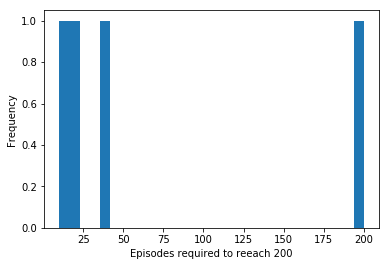

In [90]:
plt.hist(episodes_result, density=False, bins=30)
plt.ylabel('Frequency');
plt.xlabel('Episodes required to reeach 200');

### Hill-Climbing
Starting with some randomly chosen initial weights. Every episode, add some noise to the weights, and keep the new weights if the agent improves.

In [ ]:
env = gym.make('CartPole-v0')

episodes_per_update = 5
noise_scaling = 0.1  
parameters = np.random.rand(4) * 2 - 1  
bestreward = 0  
for _ in range(10000):  
    newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
    
    reward = 0  
    for i in range(episodes_per_update):
        #Instead of only running one episode to measure how good a set of weights is, we run it multiple times and sum up the rewards. 
        run = run_episode(env,newparams)
        reward += run
    
    reward = run_episode(env,newparams)
    
    if reward > bestreward:
        bestreward = reward
        parameters = newparams
        if reward == 200:
            break